In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize

%load_ext autoreload
%autoreload 1
%aimport tail_extrap.multivariate

In [2]:
font_size = 12
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

In [3]:
# df = pd.read_csv('../datasets/D.txt', sep=';', index_col=0, parse_dates=True)
with open('../datasets/E.pkl', 'rb') as f:
    df = pickle.load(f)
df.head(2)

,wind speed (m/s),significant wave height (m)
time (YYYY-MM-DD-HH),,
1965-01-01 00:00:00,12.5937,3.7853
1965-01-01 01:00:00,11.0106,3.3696


In [13]:
# self = tail_extrap.multivariate.Multivariate(df, condY_x=np.arange(1, 25))
self = tail_extrap.multivariate.Multivariate(df, condY_x=np.arange(0.1153, 25, 3.3626-0.1153))

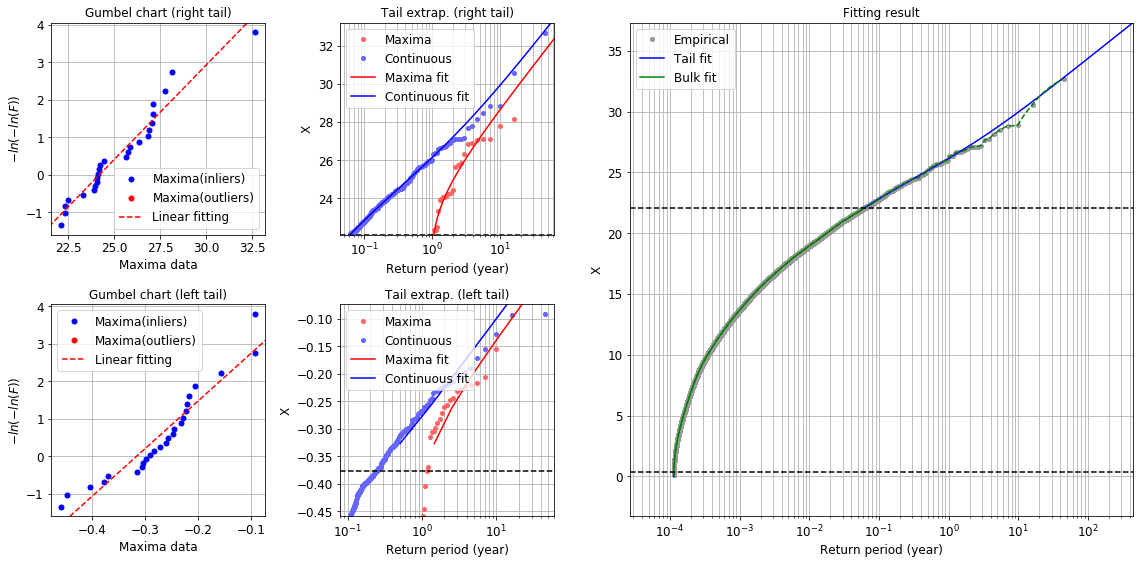

In [5]:
self._fit_marginalX()
display(self.x_dist.diag_fig)

In [6]:
with open('temp.pkl', 'wb') as f:
    pickle.dump(self, f)

In [12]:
self.condY_x

array([ 0.092     ,  3.71393333,  7.33586667, 10.9578    , 14.57973333,
       18.20166667, 21.8236    , 25.44553333, 29.06746667, 32.6894    ])

In [14]:
self.fit()
self.plot_diagnosis()

Fitting marginal X
Fitting marginal Y
Fitting discrete conditional Y
0.1153
3.3626
6.6099000000000006
9.8572
13.1045
16.3518
19.599100000000004
22.846400000000003
Fitting continuous conditional Y using bulk


KeyboardInterrupt: 

## Predict method

In [5]:
ct = self.predict(mrp=50)

In [7]:
ct['upper'] = ct['df_upper']['y_top'][1]
ct['final_x'], ct['final_y'] = self._smooth_contour_combine(ct)

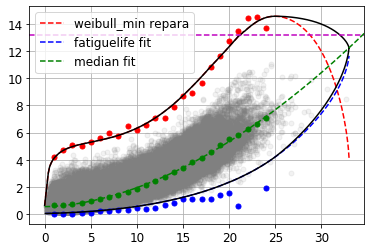

In [8]:
plt.plot(self.x_dist.data, self.y_dist.data, '.', 
         markersize=10, alpha=0.1, color=0.5*np.array([1, 1, 1]))
plt.plot(ct['jagged']['x'], ct['jagged']['y_top'], 'r.', markersize=10)
plt.plot(self.condY_x, self.median_emp, 'g.', markersize=10)
plt.plot(ct['jagged']['x'], ct['jagged']['y_bot'], 'b.', markersize=10)
plt.plot(self.x_dist.sample_coor, ct['upper'], 'r--', label=ct['df_upper'].index[0]+' repara')
plt.plot(self.x_dist.sample_coor, ct['lower'], 'b--', label=ct['df_lower'].index[0]+' fit')
plt.plot(ct['final_x'], ct['final_y'], 'k-')
xlm = plt.xlim()
ylm = plt.ylim()
plt.plot(xlm, [ct['y_mrp'], ct['y_mrp']], 'm--')
plt.plot(self.x_dist.sample_coor, self.median_pred, 'g--', label='median fit')
plt.xlim(xlm)
plt.ylim(ylm)
plt.grid(True)
plt.legend(loc='best')
plt.show()